## Exemplo de regressão linear com duas features - 2D

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

## Base de dados

In [2]:
N = 4

D = 3

X = np.zeros((N, D))

X[:,0] = 1

X[:,1] = [1, 1, 2, 2]

X[:,2] = [1, 2, 2, 3]

np.random.seed(7)

Y = np.dot(X, np.array([1, 1, 2])) + 0.97 #np.random.randn(4,)

## Estrutura da base de dados

In [3]:
print("X:", X)
print("Y:", Y)

X: [[1. 1. 1.]
 [1. 1. 2.]
 [1. 2. 2.]
 [1. 2. 3.]]
Y: [4.97 6.97 7.97 9.97]


## Visualização dos dados

(0.0, 16.0)

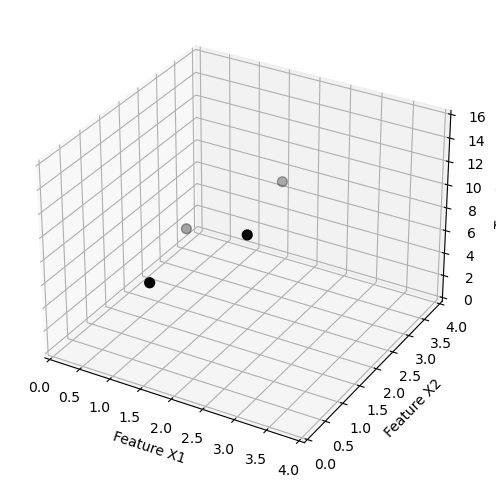

In [4]:
fig = plt.figure(figsize = (10, 6))

ax = fig.add_subplot(projection='3d')

ax.scatter(X[:,1], X[:,2], Y, color = 'black', marker = 'o', s = 50)

ax.set_xlabel('Feature X1')
ax.set_ylabel('Feature X2')
ax.set_zlabel('Target Y')
ax.set_xlim(0,4)
ax.set_ylim(0,4)
ax.set_zlim(0,16)

## Solução teórica (Ax = y, x = inv(A)y)

In [5]:
#w = np.linalg.solve(X.T.dot(X), X.T.dot(Y))

### Machine Learning "From scratch"

Modelo Matemático:

$x_1, x_2 \rightarrow{}$ features

$y \rightarrow{}$ target

$\hat{y_{i}} = w_2x_{2}^{(i)}+w_1x_{1}^{(i)}+w_0x_{0}^{(i)}$ $\rightarrow{}$ target estimado pela equação da reta

$Erro(i) = (\hat{y_{i}}-y_{i})^{2} \rightarrow{}$ erro gerado para cada linha da base de dados

$Custo(\hat{y_{i}})= Custo(w_{2}, w_{1}, w_{0}) = \frac{1}{N}\sum_{i=1}^{N}(\hat{y_{i}}-y_{i})^{2} \rightarrow{}$ função custo para cada equação da reta considerada

$\frac{\partial (Custo)}{\partial w_{0}} = \frac{\partial (Custo)}{\partial \hat{y_{i}}} \frac{\partial \hat{y_{i}}}{\partial w_{0}}  = \frac{2}{N}\sum_{i=1}^{N}(\hat{y_{i}}-y_{i}) \rightarrow{}$ derivada parcial da função custo em relação ao parâmetro $w_{0}$ da equação do plano

$\frac{\partial (Custo)}{\partial w_{1}} = \frac{\partial (Custo)}{\partial \hat{y_{i}}} \frac{\partial \hat{y_{i}}}{\partial w_{1}}  = \frac{2}{N}\sum_{i=1}^{N}(\hat{y_{i}}-y_{i})x_{1}^{(i)} \rightarrow{}$ derivada parcial da função custo em relação ao parâmetro $w_{1}$ da equação do plano

$\frac{\partial (Custo)}{\partial w_{2}} = \frac{\partial (Custo)}{\partial \hat{y_{i}}} \frac{\partial \hat{y_{i}}}{\partial w_{2}}  = \frac{2}{N}\sum_{i=1}^{N}(\hat{y_{i}}-y_{i})x_{2}^{(i)} \rightarrow{}$ derivada parcial da função custo em relação ao parâmetro $w_{2}$ da equação do plano

$\frac{\partial (Custo)}{\partial w_{0}} = 0 \rightarrow$ ponto de mínimo da função custo em relação ao parâmetro $w_{0}$

$\frac{\partial (Custo)}{\partial w_{1}} = 0 \rightarrow$ ponto de mínimo da função custo em relação ao parâmetro $w_{1}$

$\frac{\partial (Custo)}{\partial w_{2}} = 0 \rightarrow$ ponto de mínimo da função custo em relação ao parâmetro $w_{2}$

Modelo computacional:

- escolher parâmetros inciais $w_{2}$, $w_{1}$ e $w_{0}$
- calcular $\hat{y_{i}}$ para todas as linhas da base de dados
- calcular função Custo
- atualizar os parâmetros $w_{2}$, $w_{1}$ e $w_{0}$ a cada iteração, fazendo:

    - $w_{0} \leftarrow w_{0}-\alpha \frac{\partial (Custo)}{\partial w_{0}}$
    - $w_{1} \leftarrow w_{1}-\alpha \frac{\partial (Custo)}{\partial w_{1}}$
    - $w_{2} \leftarrow w_{2}-\alpha \frac{\partial (Custo)}{\partial w_{2}}$



### Gradient descendente

In [6]:
costs = []
w = np.random.randn(D) / np.sqrt(D)
learning_rate = 0.01
for t in range(200):
    Yhat = X.dot(w)
    delta = (Yhat - Y)
    w = w - learning_rate * X.T.dot(delta)
    mse = delta.dot(delta) / N
    costs.append(mse)

## Gráfico dos custos calculados por iteração

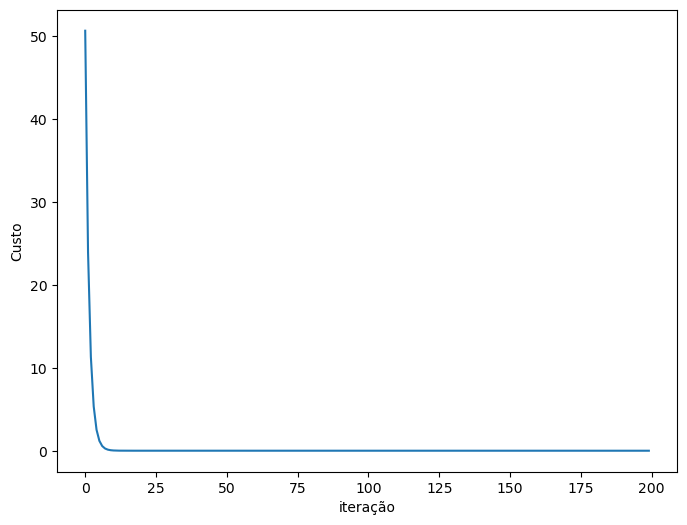

In [7]:
fig = plt.figure(figsize = (8, 6))

plt.plot(costs)

plt.xlabel('iteração')

plt.ylabel('Custo')

plt.show()

## Coeficientes ótimos do plano gerado pela regressão linear

In [8]:
print("Coeficientes w:", w)

Coeficientes w: [1.89926966 1.07994047 1.97311629]


## Visualização da solução utilizando Regressão Linear

Text(0.5, 0, 'Target Y')

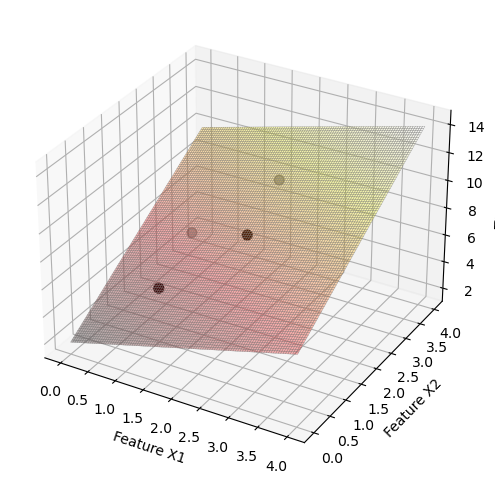

In [9]:
x1 = np.linspace(0,4,100)

x2 = np.linspace(0,4,100)

X1, X2 = np.meshgrid(x1, x2)

Y_hat = w[1]*X1 + w[2]*X2 + w[0]

fig = plt.figure(figsize = (10, 6))

ax = fig.add_subplot(projection='3d')

ax.plot_surface(X1, X2, Y_hat, cmap=cm.hot, rstride=1, cstride=1,
                    alpha=0.3, linewidth=0.2, edgecolors='gray')

#surf = ax.plot_surface(X1, X2, Y_hat, color = 'lightgray')

ax.scatter(X[:,1], X[:,2], Y, color = 'black', marker = 'o', s = 50)

ax.set_xlabel('Feature X1')
ax.set_ylabel('Feature X2')
ax.set_zlabel('Target Y')

## Precisão da aprendizagem

In [10]:
print("Yreal", Y)
print("Ycalculado", (X.dot(w)))

Yreal [4.97 6.97 7.97 9.97]
Ycalculado [4.95232642 6.92544271 8.00538318 9.97849947]


Text(0, 0.5, 'Y Real')

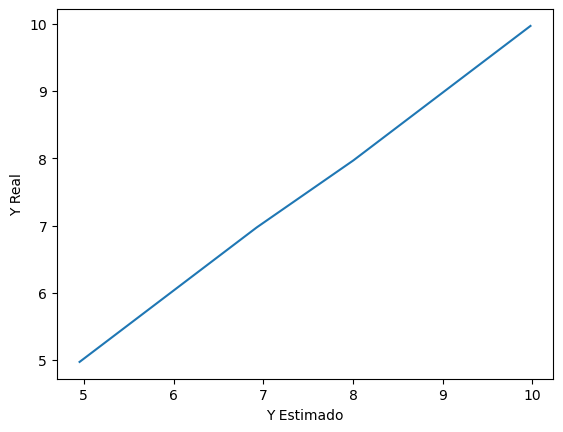

In [11]:
plt.plot((X.dot(w)),Y)
plt.xlabel('Y Estimado')
plt.ylabel('Y Real')